<a href="https://colab.research.google.com/github/FathimaThan/Medical_Cost_Prediction/blob/main/Medical_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Medical Cost For Patients**

## Problem Statement
### Hospital ABC, a leading healthcare provider, aims to optimize its resource allocation and improve patient care by understanding the factors influencing medical costs for its patients. To achieve this, Hospital ABC has collected a comprehensive dataset containing information about patients' demographics, lifestyle, health status, and medical expenses etc. The dataset includes attributes such as age, gender, BMI, smoking status, region, as well as additional information like occupation, exercise frequency, chronic conditions, and more.

## Objective
### 1. Exploratory Analysis: Explore the relationship between demographic factors (age, gender, region), lifestyle-related information (BMI, smoking status, exercise frequency), and health status (chronic conditions, mental health) with medical costs.
### 2. Insurance and Financial Factors: Investigate the impact of insurance plan type, income level, and family medical history on healthcare expenses.
### 3. Accessibility and Healthcare Utilization: Analyze the influence of distance to the nearest hospital and frequency of primary care physician visits on medical charges.
### 4. Model Development: Develop a predictive model to estimate medical costs for individual patients based on the collected features.
### 5. Model Evaluation: Evaluate the performance of the predictive model using appropriate metrics such as mean absolute error or root mean squared error.
### 6. Insights and Recommendations: Interpret the results and provide actionable insights for Hospital ABC to optimize resource allocation, healthcare planning, and patient support services.

## Expected Outcomes
###By successfully addressing the research objectives, Hospital ABC anticipates the following outcomes:
###*   Improved understanding of the factors driving medical costs for its patients.
###*   Development of a reliable predictive model for estimating individual patient medical expenses.
###*   Enhanced resource allocation and planning capabilities, leading to improved patient care and satisfaction.

# Data Collection

In [ ]:
# import  libraries:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
import warnings
# To ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
# import dataset
df = pd.read_csv('/content/medical_datanew.csv')
df

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,...,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization,Charges
0,56.0,Male,26.78763,0.0,No,East,White Collar,Daily,2.0,Gold,...,Difficult,Weak,Good,Present,High,Yes,Unavailable,4.0,975.5380,84.78763
1,69.0,Male,22.06365,4.0,Yes,West,White Collar,Monthly,2.0,Bronze,...,Difficult,Weak,Good,Absent,High,Yes,Available,2.0,1047.9770,92.06365
2,46.0,Female,24.03610,2.0,Yes,East,White Collar,Rarely,1.0,Silver,...,Difficult,Strong,Good,Absent,Low,No,Unavailable,2.0,836.3854,71.03610
3,32.0,Male,24.22982,2.0,No,North,Blue Collar,Rarely,2.0,Gold,...,NaN,Strong,Good,NaN,Low,No,Available,0.0,927.0653,58.22982
4,60.0,Male,31.78428,0.0,NaN,East,Blue Collar,Weekly,0.0,Silver,...,Easy,Weak,Poor,Present,Low,Yes,Available,2.0,1260.7970,91.78428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18.0,Male,17.79434,0.0,Yes,West,Other,Monthly,1.0,Silver,...,Difficult,Strong,Good,Absent,Low,Yes,Unavailable,2.0,932.2167,36.79434
996,35.0,Female,22.53824,1.0,Yes,NaN,Other,Monthly,1.0,NaN,...,Easy,Weak,Good,Absent,Low,Yes,Unavailable,4.0,1280.2350,58.53824
997,49.0,NaN,18.28548,4.0,No,South,Other,Monthly,2.0,Bronze,...,Easy,NaN,Poor,NaN,High,No,Unavailable,1.0,1336.6650,69.28548
998,64.0,Male,22.09611,2.0,No,West,White Collar,Rarely,0.0,Gold,...,Difficult,Strong,Good,Present,High,Yes,Unavailable,0.0,779.2834,88.09611


* Comorbidities - other health problems that someone has along with their main
health issue.
* Medication adherence - the extent to which patients follow the instructions provided by healthcare providers regarding the timing, dosage, and frequency of medication intake.

  "Yes" - means that the patient take their medications as prescribed, following the instructions provided by their healthcare provider.
  "No" - means that the patient do not consistently take their medications as prescribed, perhaps missing doses or not following the recommended schedule.

In [ ]:
df.shape

(1000, 35)

There are 1000 rows and 35 columns in the dataset

In [ ]:
df.columns

Index(['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region', 'Occupation',
       'Exercise_Frequency', 'Chronic_Conditions', 'Insurance_Plan_Type',
       'Marital_Status', 'Distance_to_Nearest_Hospital', 'Income_Level',
       'Family_Medical_History', 'Primary_Care_Physician_Visits',
       'Mental_Health_Status', 'Prescription_Medication_Usage',
       'Employment_Status', 'Education_Level', 'Dietary_Habits',
       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
       'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
       'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine',
       'Emergency_Room_Visits', 'Healthcare_Utilization', 'Charges'],
      dtype='object')

These are the columns in the dataset.

In [ ]:
# Selecting only relevant features
# df = df[["Age", "Sex", "BMI", "Smoker", "Region",	"Exercise_Frequency",	"Chronic_Conditions",	"Insurance_Plan_Type","Distance_to_Nearest_Hospital",
      #  "Comorbidities", "Income_Level", "Primary_Care_Physician_Visits", "Mental_Health_Status","Family_Medical_History", "Charges" ]]

# Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            950 non-null    float64
 1   Sex                            950 non-null    object 
 2   BMI                            951 non-null    float64
 3   Children                       951 non-null    float64
 4   Smoker                         952 non-null    object 
 5   Region                         952 non-null    object 
 6   Occupation                     951 non-null    object 
 7   Exercise_Frequency             951 non-null    object 
 8   Chronic_Conditions             950 non-null    float64
 9   Insurance_Plan_Type            951 non-null    object 
 10  Marital_Status                 953 non-null    object 
 11  Distance_to_Nearest_Hospital   952 non-null    float64
 12  Income_Level                   950 non-null    ob

* There are 25 columns with object data type (category), 19 columns with float data type.
* Null values are present in many columns.
* There are 1000 entries and 35 columns.

In [ ]:
df.describe()

,Age,BMI,Children,Chronic_Conditions,Distance_to_Nearest_Hospital,Family_Medical_History,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges
count,950.000000,951.000000,951.000000,950.000000,952.000000,950.000000,950.000000,951.000000,952.000000,902.000000
mean,49.824211,24.951876,2.022082,0.987368,9.548402,0.510526,4.482105,2.080967,993.174177,76.292654
std,18.090384,5.153607,1.421836,0.810786,5.683926,0.500152,2.866028,1.387450,191.866884,18.969338
min,18.000000,8.057860,0.000000,0.000000,0.004859,0.000000,0.000000,0.000000,302.044000,32.640570
25%,35.000000,21.667005,1.000000,0.000000,4.678912,0.000000,2.000000,1.000000,860.441375,60.710098
50%,50.000000,24.795710,2.000000,1.000000,9.295443,1.000000,5.000000,2.000000,997.597050,76.404575
75%,66.000000,28.548710,3.000000,2.000000,14.103435,1.000000,7.000000,3.000000,1124.350500,91.895003
max,79.000000,40.709830,4.000000,2.000000,19.978090,1.000000,9.000000,4.000000,1545.466000,120.709800


* Minimum age is 18, maximum age is 79 and median is 48.
* Minimum BMI is 8, which is quite low and is extremely underweight. It could be an error in the data or an outlier. Maximum Bmi is 40.
* Missing data may be present in all columns as indicated by the difference in count across columns.
* Charges columns have an average value of 76.29, with a standard deviation of 18.96.

In [ ]:
df.describe(include = 'object').transpose()

,count,unique,top,freq
Sex,950,2,Male,496
Smoker,952,2,No,476
Region,952,4,East,248
Occupation,951,3,Other,328
Exercise_Frequency,951,4,Weekly,271
Insurance_Plan_Type,951,3,Bronze,328
Marital_Status,953,3,Married,332
Income_Level,950,3,Low,329
Mental_Health_Status,952,3,Fair,332
Prescription_Medication_Usage,951,2,No,482


Here you can see the count of values in categorical columns, no.of unique values, top value in each column and their no.of occurances.

In [ ]:
# Checking for null values
df.isna().sum()

Age                               50
Sex                               50
BMI                               49
Children                          49
Smoker                            48
Region                            48
Occupation                        49
Exercise_Frequency                49
Chronic_Conditions                50
Insurance_Plan_Type               49
Marital_Status                    47
Distance_to_Nearest_Hospital      48
Income_Level                      50
Family_Medical_History            50
Primary_Care_Physician_Visits     50
Mental_Health_Status              48
Prescription_Medication_Usage     49
Employment_Status                 48
Education_Level                   50
Dietary_Habits                    48
Alcohol_Consumption              348
Sleep_Quality                     49
Stress_Level                      48
Medication_Adherence              50
Physical_Activity                 47
Access_to_Healthcare              49
Social_Support                    50
E

There are null values in all columns

In [ ]:
# Numerical columns
df.select_dtypes(include = 'float').columns

Index(['Age', 'BMI', 'Children', 'Chronic_Conditions',
       'Distance_to_Nearest_Hospital', 'Family_Medical_History',
       'Primary_Care_Physician_Visits', 'Emergency_Room_Visits',
       'Healthcare_Utilization', 'Charges'],
      dtype='object')

In [ ]:
# imputation of numerical columns  using mean
columns_to_impute = ['Age', 'BMI', 'Children', 'Chronic_Conditions',
       'Distance_to_Nearest_Hospital', 'Family_Medical_History',
       'Primary_Care_Physician_Visits', 'Emergency_Room_Visits', 'Charges']
imputer=SimpleImputer(strategy='mean')
dfimputed=imputer.fit_transform(df[columns_to_impute])
df[columns_to_impute] = dfimputed

In [ ]:
median_value = df['Healthcare_Utilization'].median()
df['Healthcare_Utilization'].fillna(median_value, inplace=True)

In [ ]:
df

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,...,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization,Charges
0,56.0,Male,26.787630,0.0,No,East,White Collar,Daily,2.0,Gold,...,Difficult,Weak,Good,Present,High,Yes,Unavailable,4.0,975.5380,84.787630
1,69.0,Male,22.063650,4.0,Yes,West,White Collar,Monthly,2.0,Bronze,...,Difficult,Weak,Good,Absent,High,Yes,Available,2.0,1047.9770,92.063650
2,46.0,Female,24.036100,2.0,Yes,East,White Collar,Rarely,1.0,Silver,...,Difficult,Strong,Good,Absent,Low,No,Unavailable,2.0,836.3854,71.036100
3,32.0,Male,24.229820,2.0,No,North,Blue Collar,Rarely,2.0,Gold,...,NaN,Strong,Good,NaN,Low,No,Available,0.0,927.0653,58.229820
4,60.0,Male,31.784280,0.0,NaN,East,Blue Collar,Weekly,0.0,Silver,...,Easy,Weak,Poor,Present,Low,Yes,Available,2.0,1260.7970,91.784280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18.0,Male,17.794340,0.0,Yes,West,Other,Monthly,1.0,Silver,...,Difficult,Strong,Good,Absent,Low,Yes,Unavailable,2.0,932.2167,36.794340
996,35.0,Female,22.538240,1.0,Yes,NaN,Other,Monthly,1.0,NaN,...,Easy,Weak,Good,Absent,Low,Yes,Unavailable,4.0,1280.2350,58.538240
997,49.0,NaN,18.285480,4.0,No,South,Other,Monthly,2.0,Bronze,...,Easy,NaN,Poor,NaN,High,No,Unavailable,1.0,1336.6650,69.285480
998,64.0,Male,22.096110,2.0,No,West,White Collar,Rarely,0.0,Gold,...,Difficult,Strong,Good,Present,High,Yes,Unavailable,0.0,779.2834,88.096110


In [ ]:
# Checking for outliers

def detect_outliers_iqr(data):

  # Calculate quartiles
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)

  # Calculate IQR
  IQR = Q3 - Q1

  # Define Outlier Threshold
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Identify Outliers
  outliers = [x for x in data if x < lower_bound or x > upper_bound]

  return outliers

# Detect outliers in all specified columns
columns_to_check = ['Age', 'BMI', 'Children', 'Chronic_Conditions',
       'Distance_to_Nearest_Hospital', 'Family_Medical_History',
       'Primary_Care_Physician_Visits', 'Emergency_Room_Visits',
       'Healthcare_Utilization', 'Charges']
outliers_dict = {}
for column in columns_to_check:
    outliers = detect_outliers_iqr(df[column])
    outliers_dict[column] = outliers

print("Outliers in each column:")
for column, outliers in outliers_dict.items():
    print(column, ":", outliers)

Outliers in each column:
Age : []
BMI : [11.43755, 11.76374, 37.82029, 40.47025, 39.73106, 40.70983, 38.14606, 8.05786, 38.12543, 10.96891, 11.20201]
Children : []
Chronic_Conditions : []
Distance_to_Nearest_Hospital : []
Family_Medical_History : []
Primary_Care_Physician_Visits : []
Emergency_Room_Visits : []
Healthcare_Utilization : [408.4949, 486.3093, 1531.999, 302.044, 1509.468, 484.0518, 1512.7, 476.1337, 1545.466, 467.0529]
Charges : []


There is outliers in BMI column

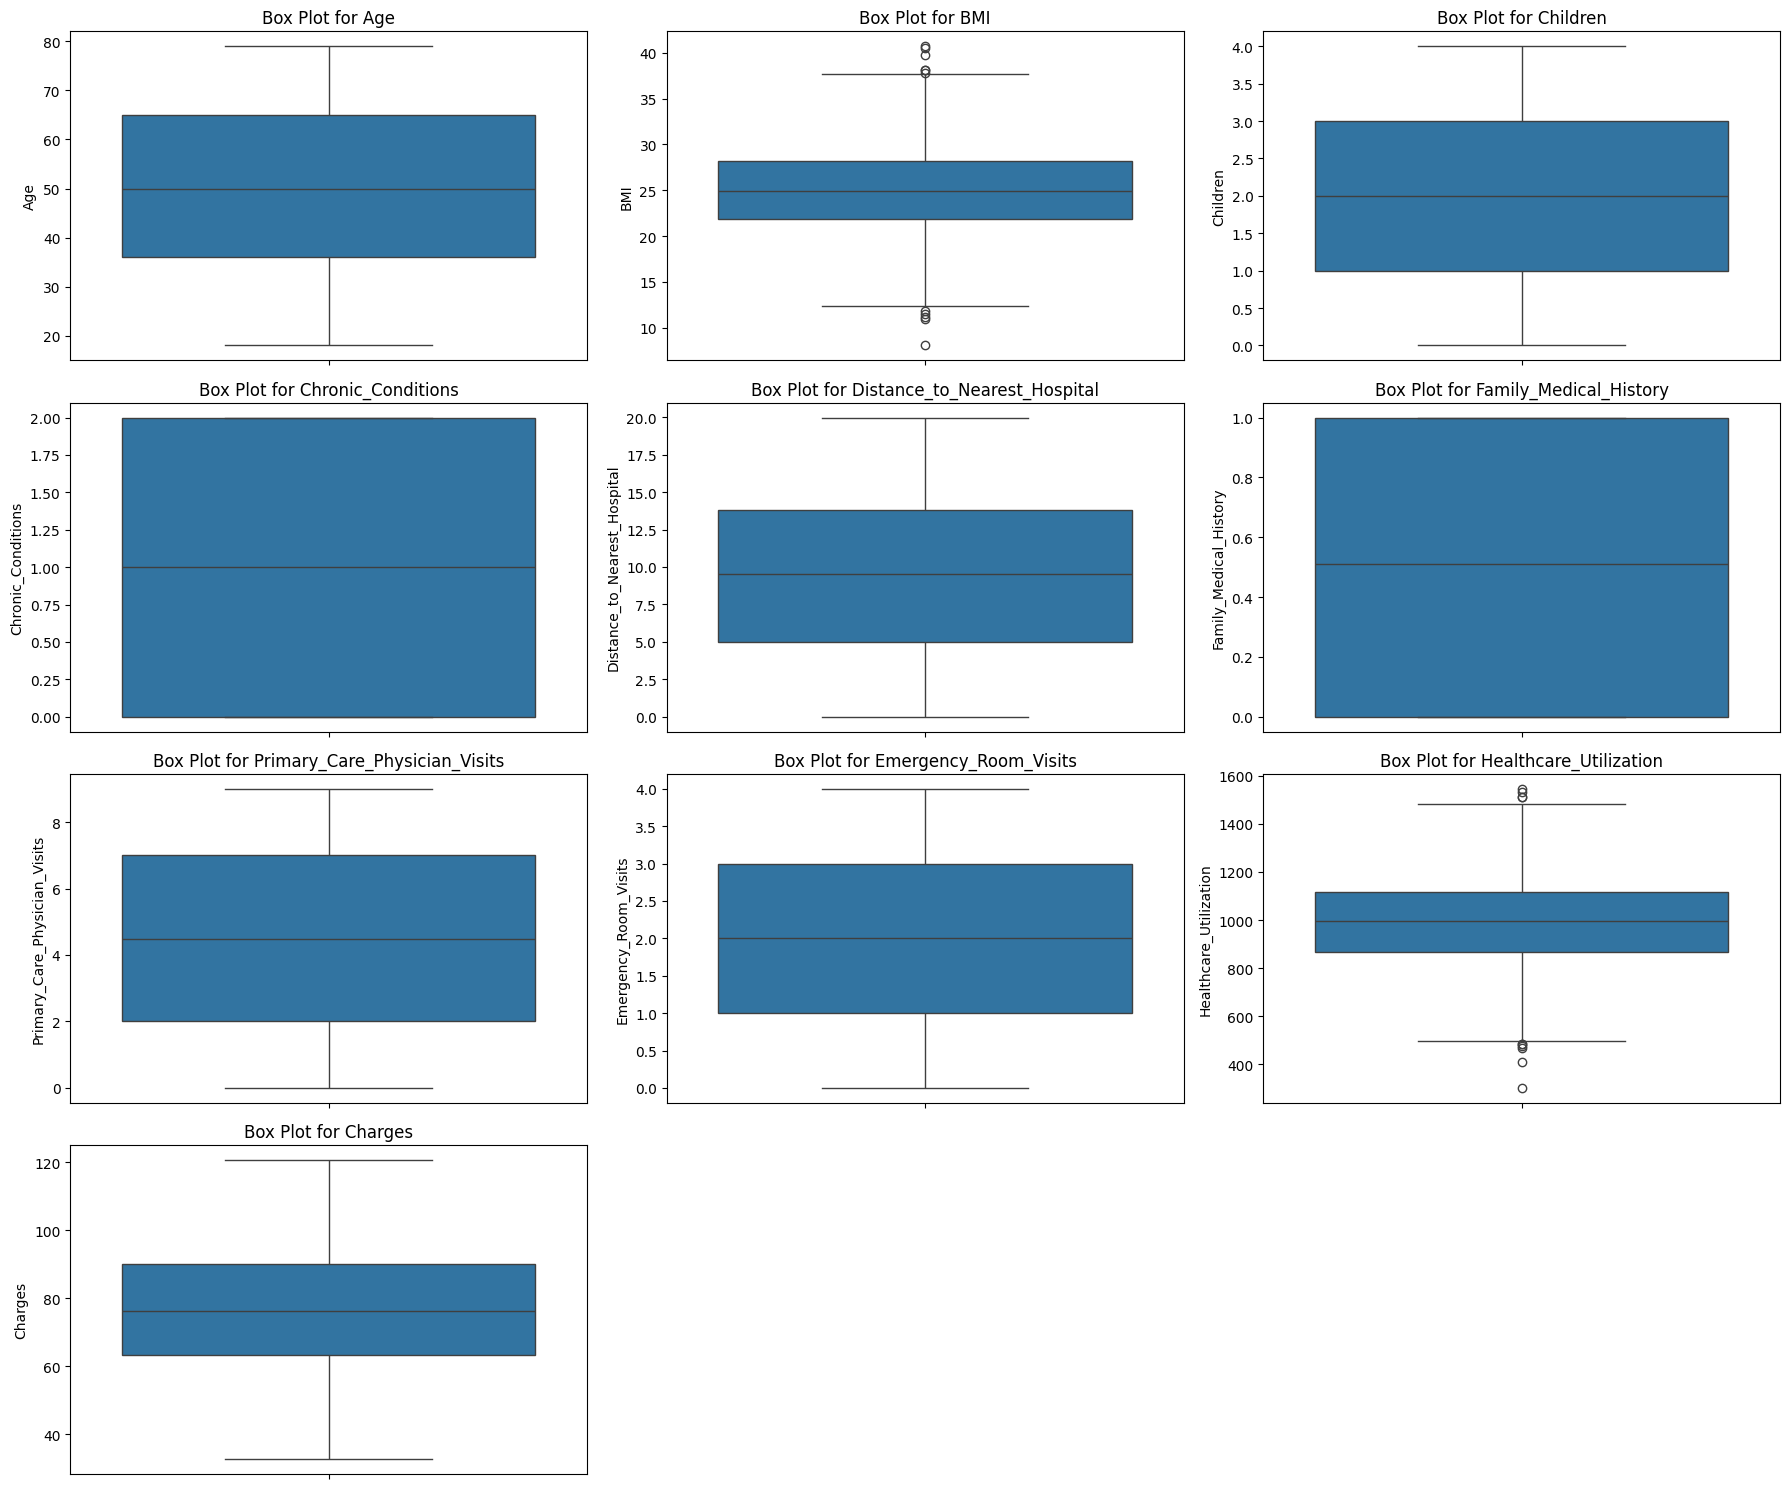

In [ ]:
# Checking for outliers using Box plot
columns=['Age', 'BMI', 'Children', 'Chronic_Conditions',
       'Distance_to_Nearest_Hospital', 'Family_Medical_History',
       'Primary_Care_Physician_Visits', 'Emergency_Room_Visits',
       'Healthcare_Utilization', 'Charges']
plt.figure(figsize=(18,15))
for i,column in enumerate(columns,1):
    plt.subplot(4,3,i)
    sns.boxplot(y=column,data=df)
    plt.title(f'Box Plot for {column}')
plt.tight_layout()
plt.show()

The points outside the boxplot of BMI and Healthcare_Utilization indicate outliers

In [ ]:
# Dealing outliers in BMI column

# Calculate the median of BMI column
median_bmi = df['BMI'].median()

# Replace outliers with median
df.loc[df['BMI'] < 13, 'BMI'] = median_bmi
df.loc[df['BMI'] > 37, 'BMI'] = median_bmi


# Calculate the median of Healthcare_Utilization column
median_hu = df['Healthcare_Utilization'].median()

# Replace outliers with median
df.loc[df['Healthcare_Utilization'] < 487, 'Healthcare_Utilization'] = median_hu
df.loc[df['Healthcare_Utilization'] > 1508, 'Healthcare_Utilization'] = median_hu

In [ ]:
# Checking for outliers after handling them
columns_to_check = ['Age', 'BMI', 'Children', 'Chronic_Conditions',
       'Distance_to_Nearest_Hospital', 'Family_Medical_History',
       'Primary_Care_Physician_Visits', 'Emergency_Room_Visits',
       'Healthcare_Utilization', 'Charges']

outliers_dict = {}
for column in columns_to_check:
    outliers = detect_outliers_iqr(df[column])
    outliers_dict[column] = outliers

print("Outliers in each column:")
for column, outliers in outliers_dict.items():
    print(column, ":", outliers)

Outliers in each column:
Age : []
BMI : []
Children : []
Chronic_Conditions : []
Distance_to_Nearest_Hospital : []
Family_Medical_History : []
Primary_Care_Physician_Visits : []
Emergency_Room_Visits : []
Healthcare_Utilization : []
Charges : []


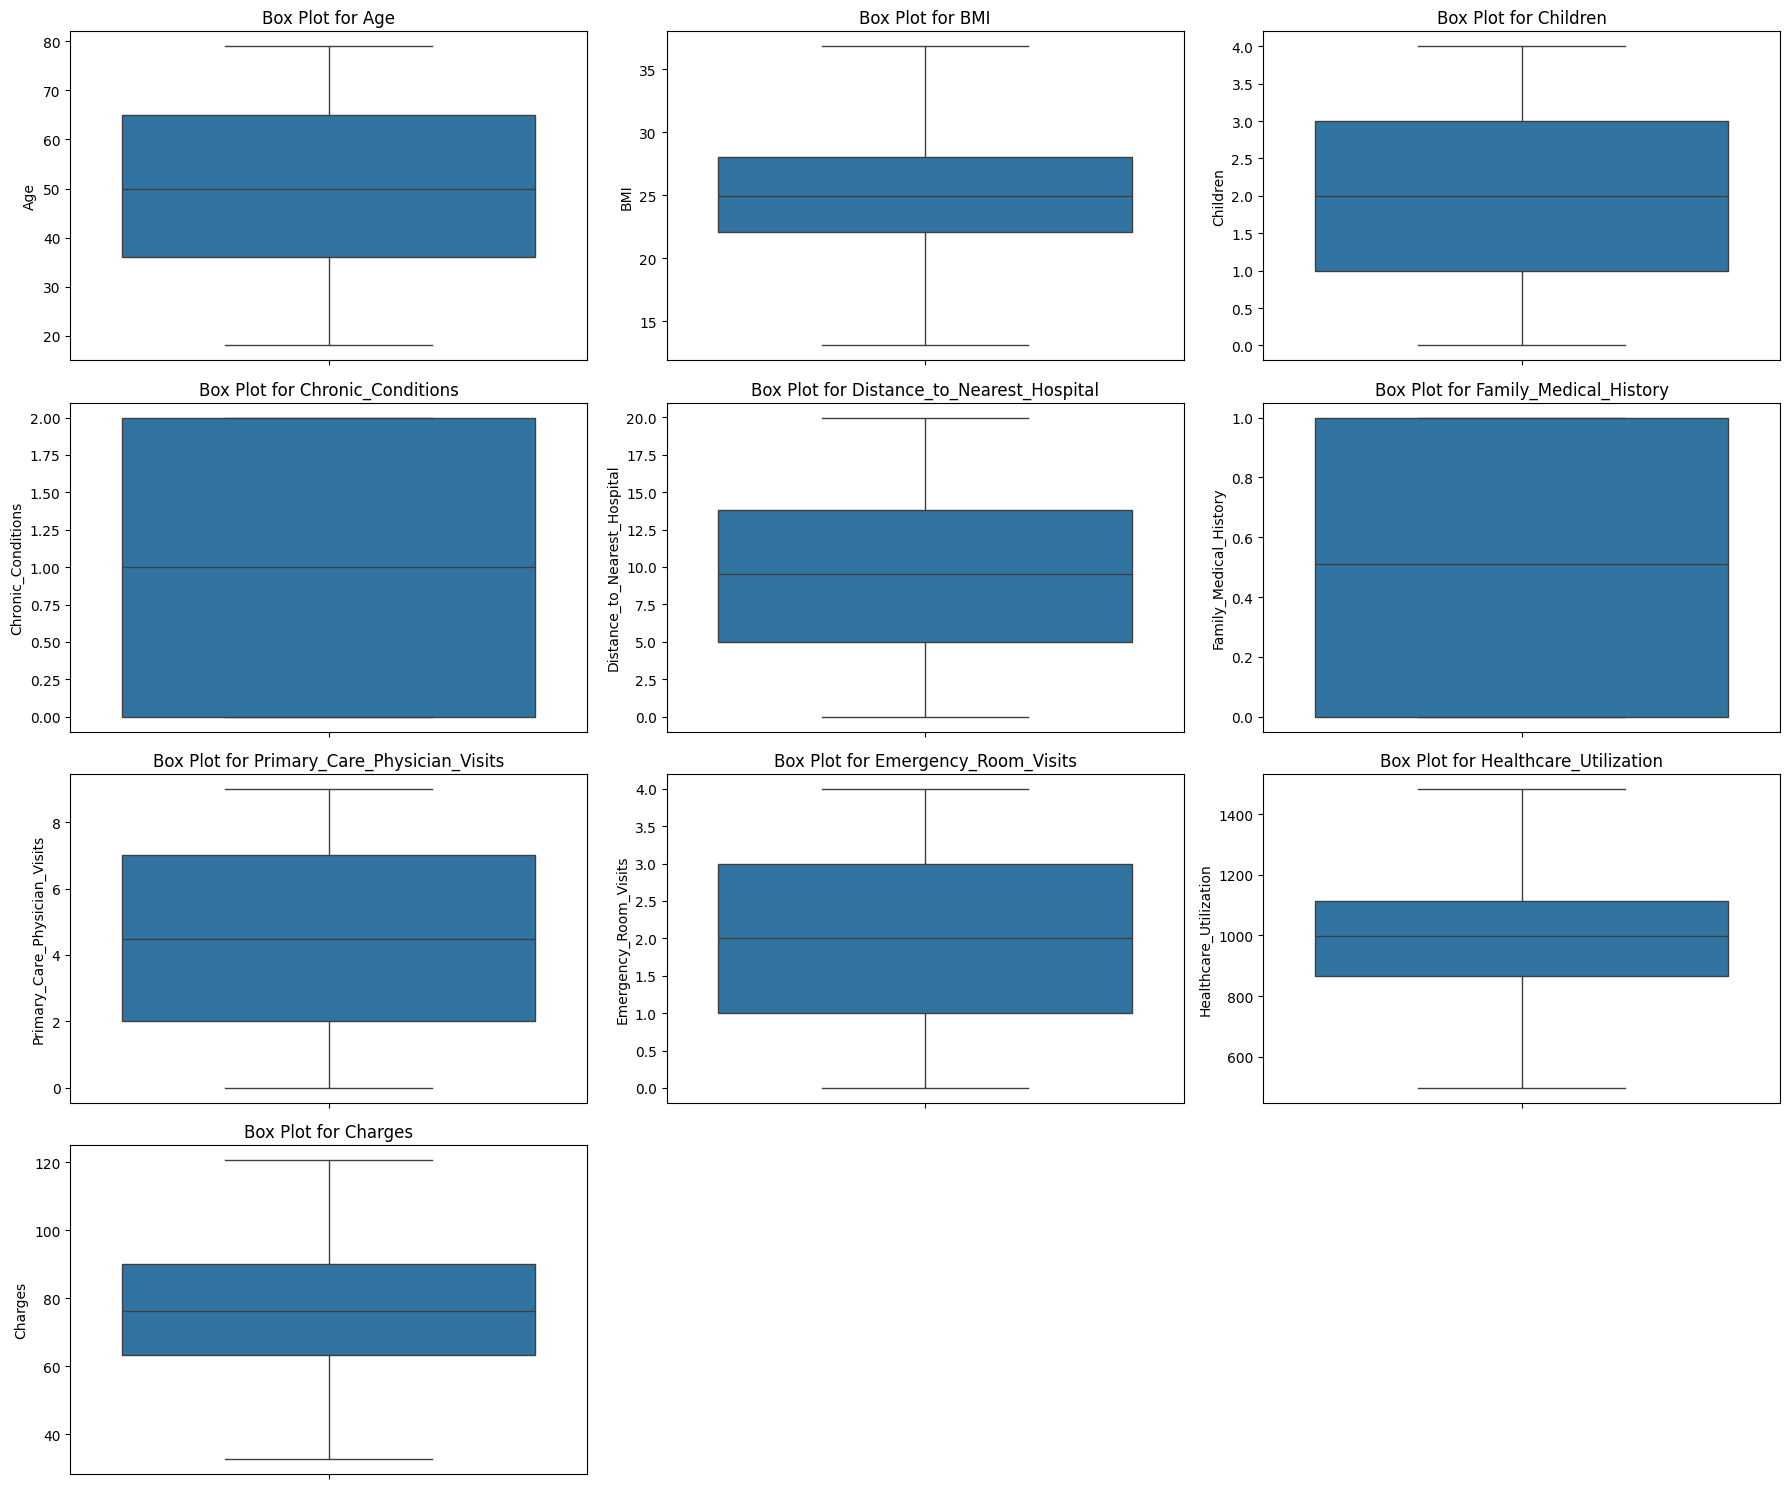

In [ ]:
# Checking for outliers using Box plot
columns=['Age', 'BMI', 'Children', 'Chronic_Conditions',
       'Distance_to_Nearest_Hospital', 'Family_Medical_History',
       'Primary_Care_Physician_Visits', 'Emergency_Room_Visits',
       'Healthcare_Utilization', 'Charges']
plt.figure(figsize=(18,15))
for i,column in enumerate(columns,1):
    plt.subplot(4,3,i)
    sns.boxplot(y=column,data=df)
    plt.title(f'Box Plot for {column}')
plt.tight_layout()
plt.show()

There are no outliers anymore

In [ ]:
# function to spot missing values
def spot_missing_values(df):
    missing_values = {'NaN': 0, 'None': 0, 'nan': 0, 'Vacant Space': 0}

    for column in df.columns:
        for value in df[column]:
            if pd.isnull(value):
                missing_values['NaN'] += 1
            elif value == 'None':
                missing_values['None'] += 1
            elif isinstance(value, str) and value.lower() == 'nan':
                missing_values['nan'] += 1
            elif pd.isnull(value):
                missing_values['Vacant Space'] += 1

    return missing_values

# Spot missing values in the DataFrame
missing_values_counts = spot_missing_values(df)

# Report if any missing values are found
if any(count > 0 for count in missing_values_counts.values()):
    print("Missing values spotted:")
    for value_type, count in missing_values_counts.items():
        if count > 0:
            print(f"{value_type}: {count}")
else:
    print("No missing values spotted.")

Missing values spotted:
NaN: 1518


In [ ]:
# dealing with null values in all other columns
for column in df.columns:
  mode_value = df[column].mode()[0]
  df[column].fillna(mode_value, inplace=True)

In [ ]:
df.isnull().sum()

Age                              0
Sex                              0
BMI                              0
Children                         0
Smoker                           0
Region                           0
Occupation                       0
Exercise_Frequency               0
Chronic_Conditions               0
Insurance_Plan_Type              0
Marital_Status                   0
Distance_to_Nearest_Hospital     0
Income_Level                     0
Family_Medical_History           0
Primary_Care_Physician_Visits    0
Mental_Health_Status             0
Prescription_Medication_Usage    0
Employment_Status                0
Education_Level                  0
Dietary_Habits                   0
Alcohol_Consumption              0
Sleep_Quality                    0
Stress_Level                     0
Medication_Adherence             0
Physical_Activity                0
Access_to_Healthcare             0
Social_Support                   0
Environmental_Factors            0
Genetic_Predispositi

# Exploratory Data Analysis

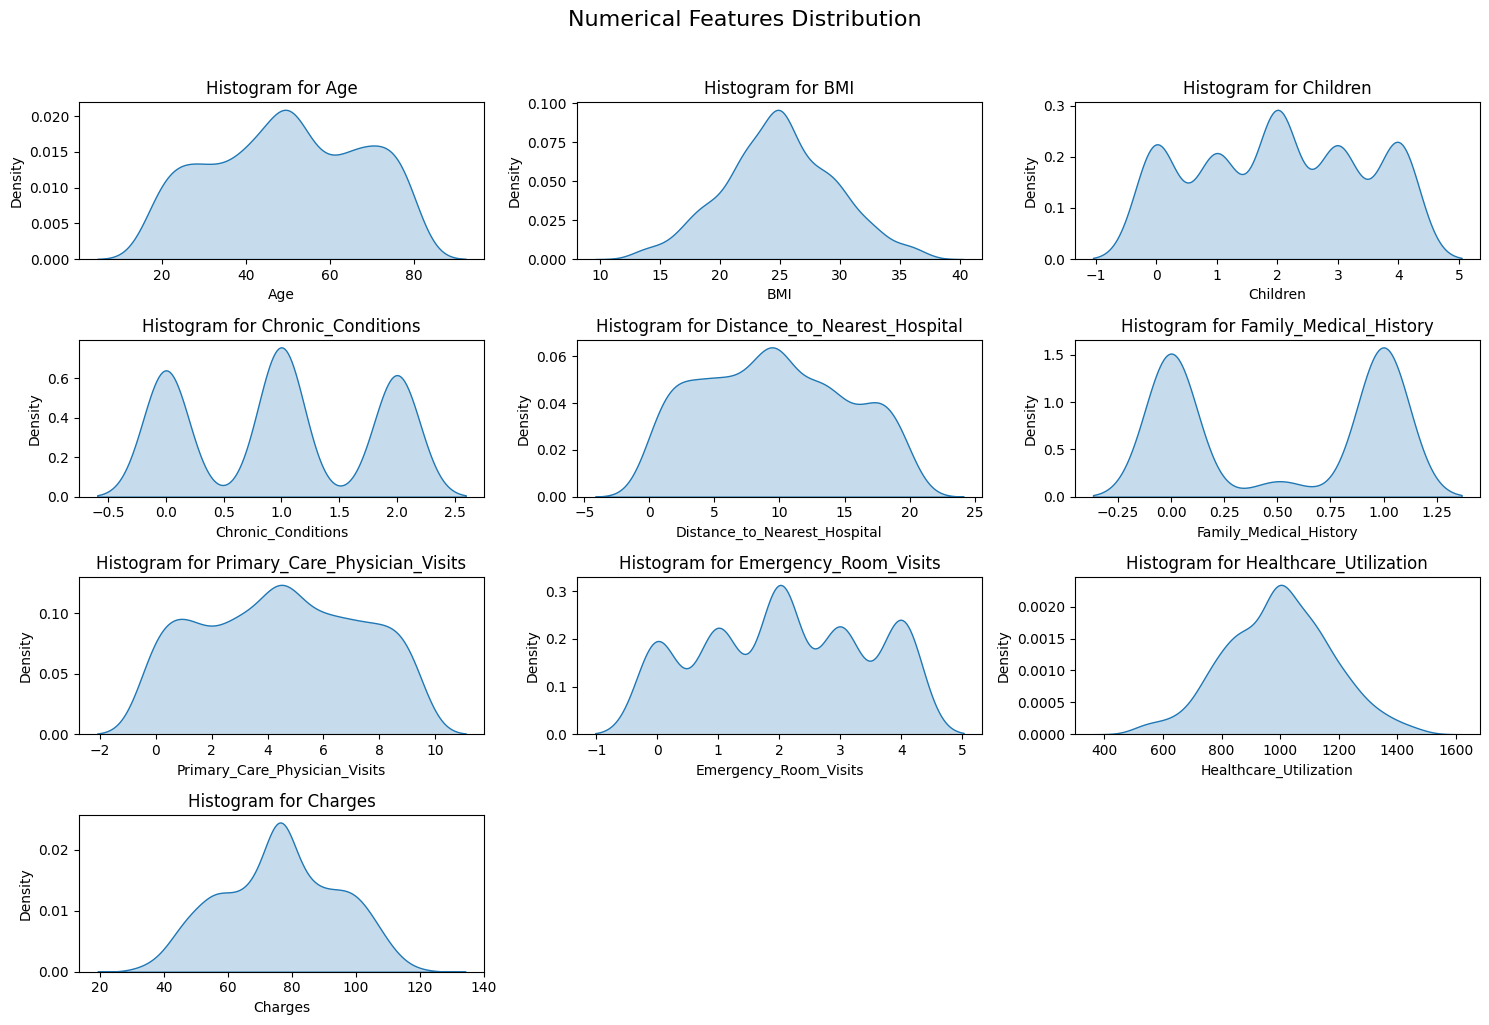

In [ ]:
plt.figure(figsize = (15, 10))
plt.suptitle('Numerical Features Distribution', y = 1.02, fontsize=16)
columns_to_plot = ['Age', 'BMI', 'Children', 'Chronic_Conditions', 'Distance_to_Nearest_Hospital', 'Family_Medical_History',
       'Primary_Care_Physician_Visits', 'Emergency_Room_Visits', 'Healthcare_Utilization', 'Charges']
for i, column in enumerate(columns_to_plot, 1):
  plt.subplot(4, 3, i)
  sns.kdeplot(data=df, x=column, fill=True)
  plt.title(f'Histogram for {column}')
plt.tight_layout()

*   BMI, Charges and Healthcare Utilization has normal distribution.
*   Other columns shows uniform distribution.

In [ ]:
for column in columns_to_plot:
    skewness = df[column].skew()
    print(f"Skewness of {column}: {skewness}")
    if skewness < -0.5:
        print('Negatively skewed')
    elif skewness > 0.5:
        print('Positively skewed')
    elif abs(skewness) <= 0.5:
        print('Symmetrical')

Skewness of Age: -0.0674934824368134
Symmetrical
Skewness of BMI: 0.02918492120265752
Symmetrical
Skewness of Children: -0.030945107878333777
Symmetrical
Skewness of Chronic_Conditions: 0.023663518660462648
Symmetrical
Skewness of Distance_to_Nearest_Hospital: 0.10028285212488872
Symmetrical
Skewness of Family_Medical_History: -0.043273602365960465
Symmetrical
Skewness of Primary_Care_Physician_Visits: -0.005097023796674015
Symmetrical
Skewness of Emergency_Room_Visits: -0.05657977588834204
Symmetrical
Skewness of Healthcare_Utilization: -0.034134273555187535
Symmetrical
Skewness of Charges: -0.045046731880120185
Symmetrical


*   Age, Children, Family_Medical_History, Emergency_Room_Visits, Healthcare_Utilization and Charges column are symmetrical with a sligh negative skew indicated by the negative sign.
*   Other columns are symmetrical with slight positive skew.

In [ ]:
df.select_dtypes(include = 'object').columns

Index(['Sex', 'Smoker', 'Region', 'Occupation', 'Exercise_Frequency',
       'Insurance_Plan_Type', 'Marital_Status', 'Income_Level',
       'Mental_Health_Status', 'Prescription_Medication_Usage',
       'Employment_Status', 'Education_Level', 'Dietary_Habits',
       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
       'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
       'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine'],
      dtype='object')

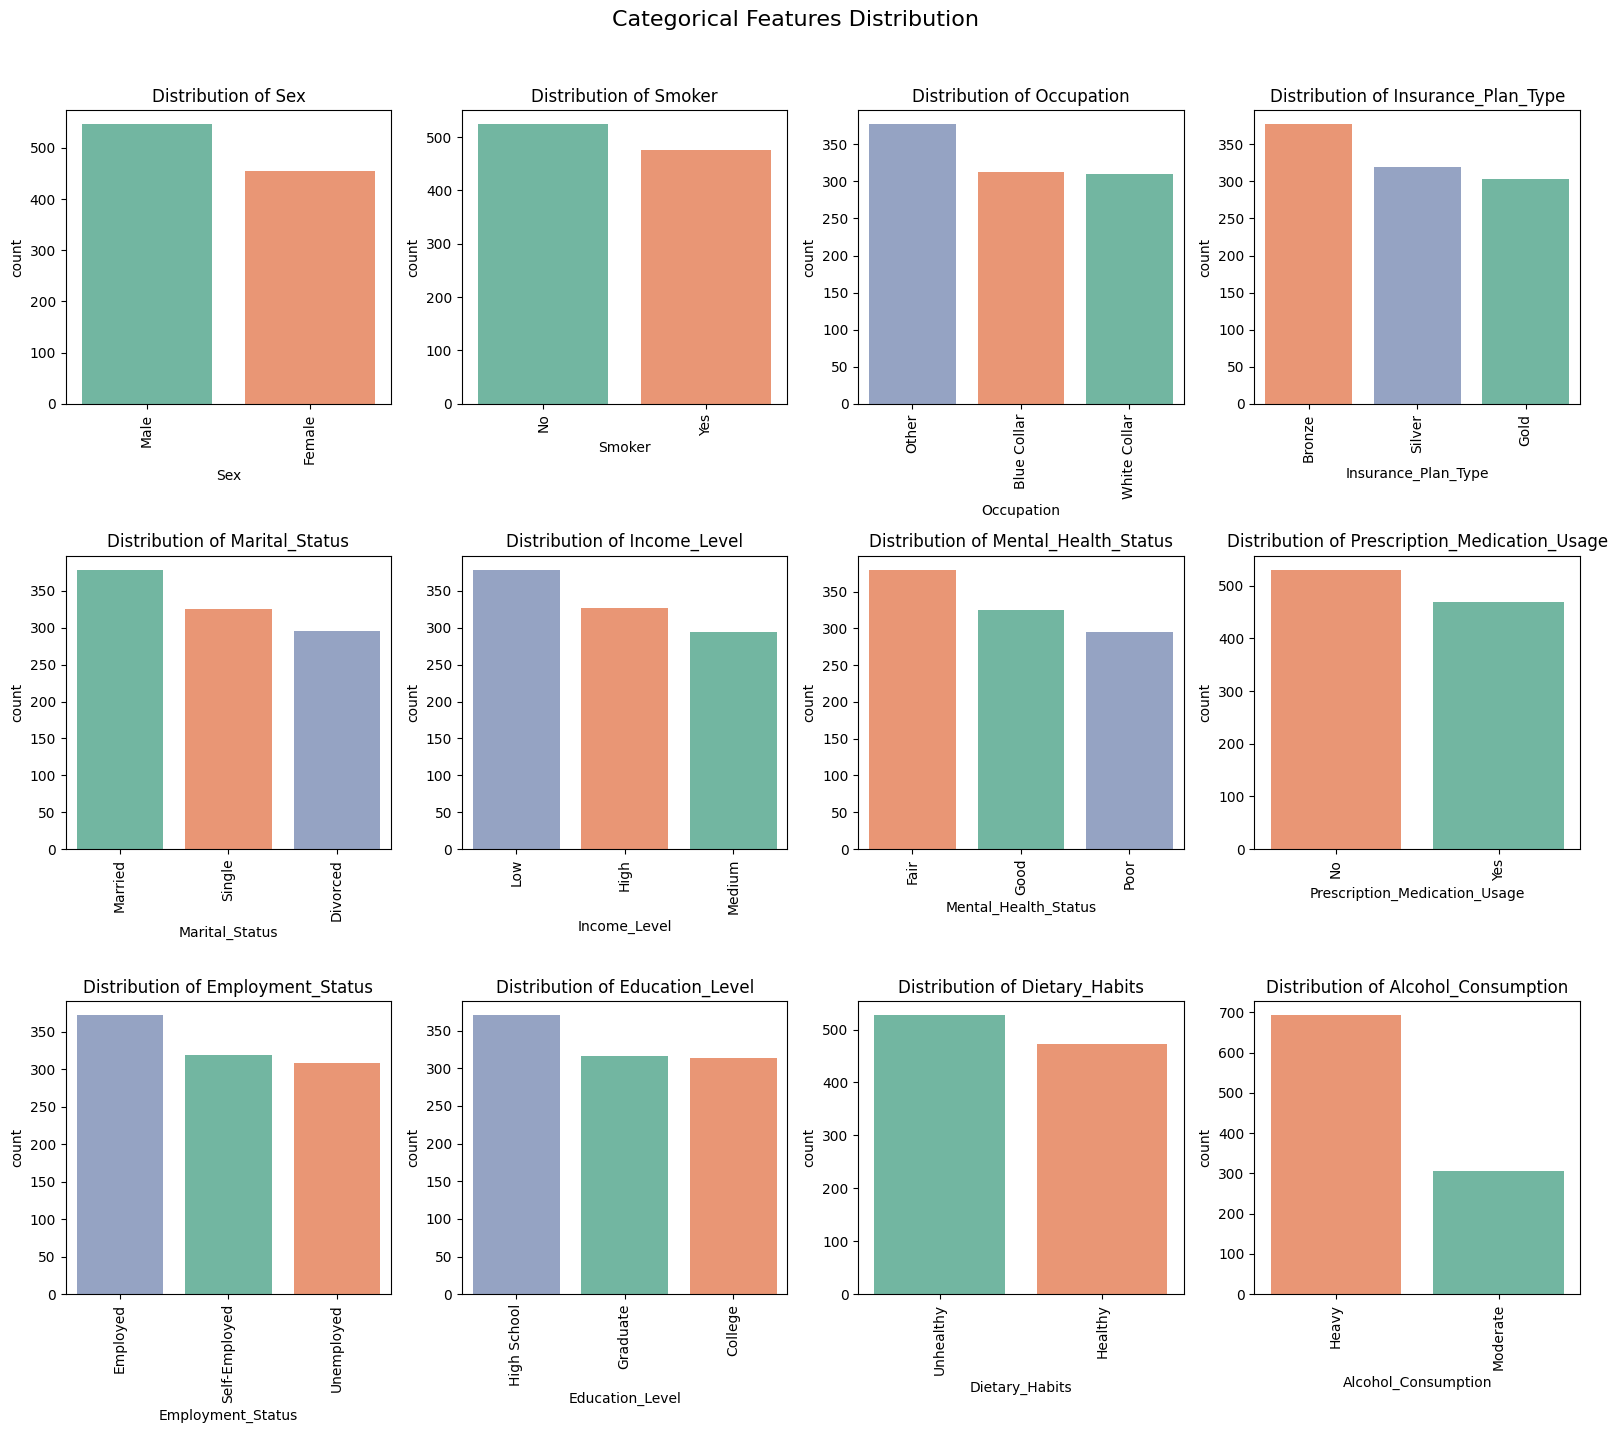

In [ ]:
plt.figure(figsize = (16, 14))

columns_to_plot1 = ['Sex', 'Smoker', 'Occupation', 'Insurance_Plan_Type', 'Marital_Status', 'Income_Level', 'Mental_Health_Status',
                    'Prescription_Medication_Usage', 'Employment_Status', 'Education_Level', 'Dietary_Habits', 'Alcohol_Consumption']
plt.suptitle('Categorical Features Distribution', y = 1.02, fontsize=16)

for index,column in enumerate(columns_to_plot1, 1):
  plt.subplot(3, 4, index)
  sns.countplot(x = df[column], order=df[column].value_counts().index, palette = 'Set2', hue = df[column])
  plt.title(f'Distribution of {column}')
  plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

*  The graph illustrates a predominant frequency of males within the dataset's "sex" column.
*  The majority of patients are non-smokers.
*  The distribution of white collar and blue collar job is nearly identical with the majority doing other jobs.
*  Most of the insurance plans held by patients fall under the Bronze category.
*  Majority of the patients are married.
*  The income level tends to be low for the majority of patients.
*  Mental health status is generally rated as fair for the majority of individuals.
*  'No' has higher frequency in prescription medication usage indicating majority don't use prescription medication.
*  A significant majority of patients are employed, only few are unemployed.
*  Majority of patients have high school education while only minority have completed college education.
*  Unhealthy dietary habits are prevalent among the majority of patients..
*  The majority of patients report high levels of alcohol consumption.


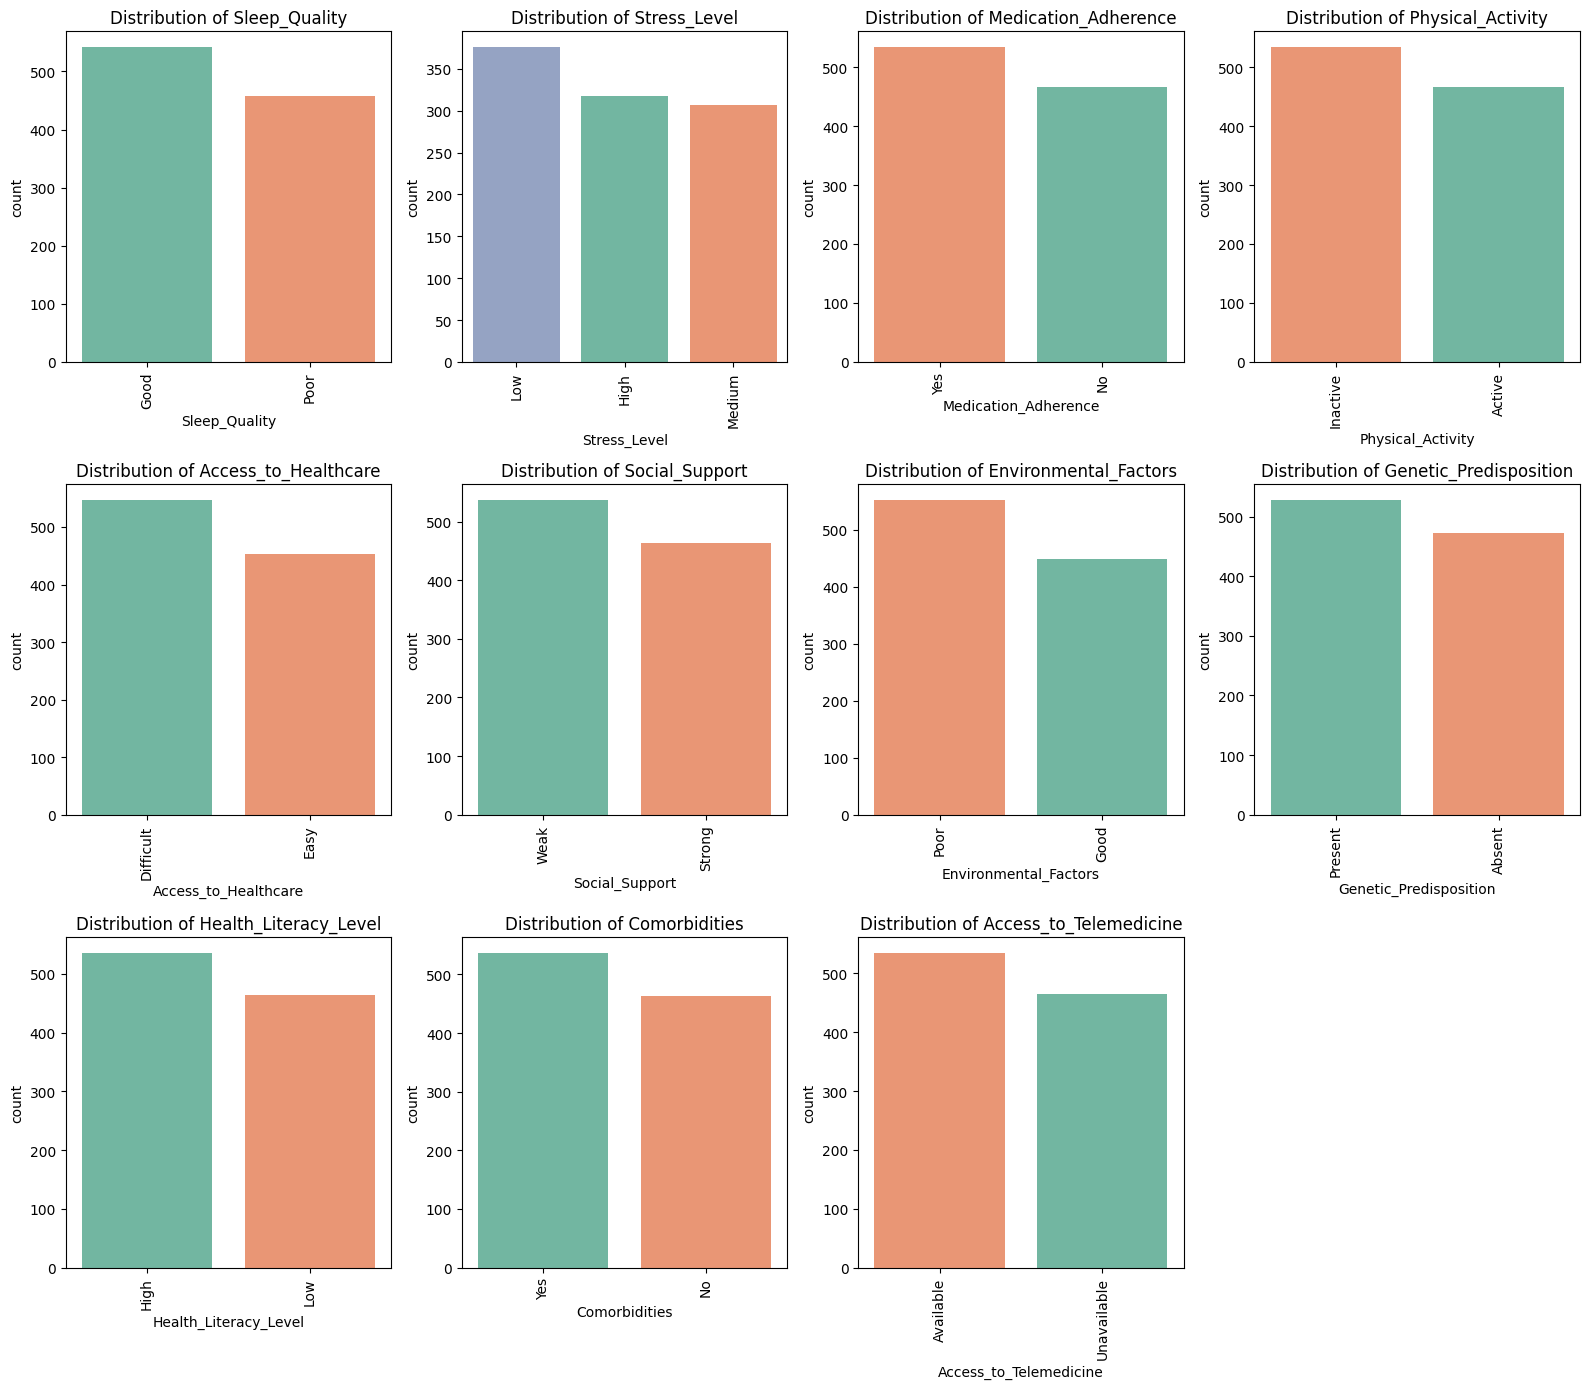

In [ ]:
plt.figure(figsize = (16, 14))

columns_to_plot1 = ['Sleep_Quality', 'Stress_Level', 'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare', 'Social_Support',
                    'Environmental_Factors', 'Genetic_Predisposition', 'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine']

for index,column in enumerate(columns_to_plot1, 1):
  plt.subplot(3, 4, index)
  sns.countplot(x = df[column], order=df[column].value_counts().index, palette = 'Set2', hue = df[column])
  plt.title(f'Distribution of {column}')
  plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

*  Most patients reported experiencing good quality sleep.
*  The majority reported low levels of stress.
*  "Yes" is the predominant response in the medication adherence column.
*  A significant portion of patients are inactive.
*  Access to healthcare is challenging for the majority.
*  Many patients lack adequate social support.
*  The majority reported a negative impact of environmental factors on health.
*  Genetic predisposition is prevalent among the majority.
*  A majority of patients reported high health literacy.
*  A significant proportion of patients have comorbidities.
*  While access to telemedicine is available for many, a notable portion reported its unavailability.




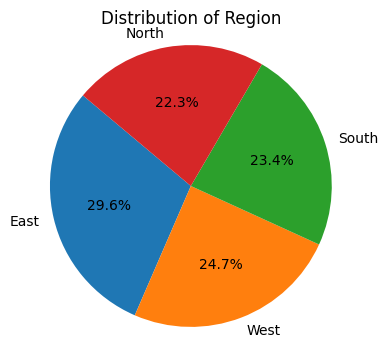

In [ ]:
# Calculate the value counts for the Region column
value_counts = df['Region'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Around 30% of the patient population hails from the East region.

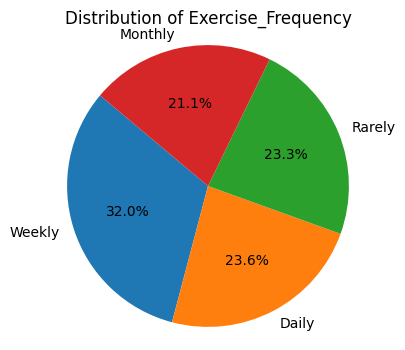

In [ ]:
# Calculate the value counts for the Region column
value_counts = df['Exercise_Frequency'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Exercise_Frequency')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Around 32% reported that they engage in exercise on a weekly basis.


In [ ]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

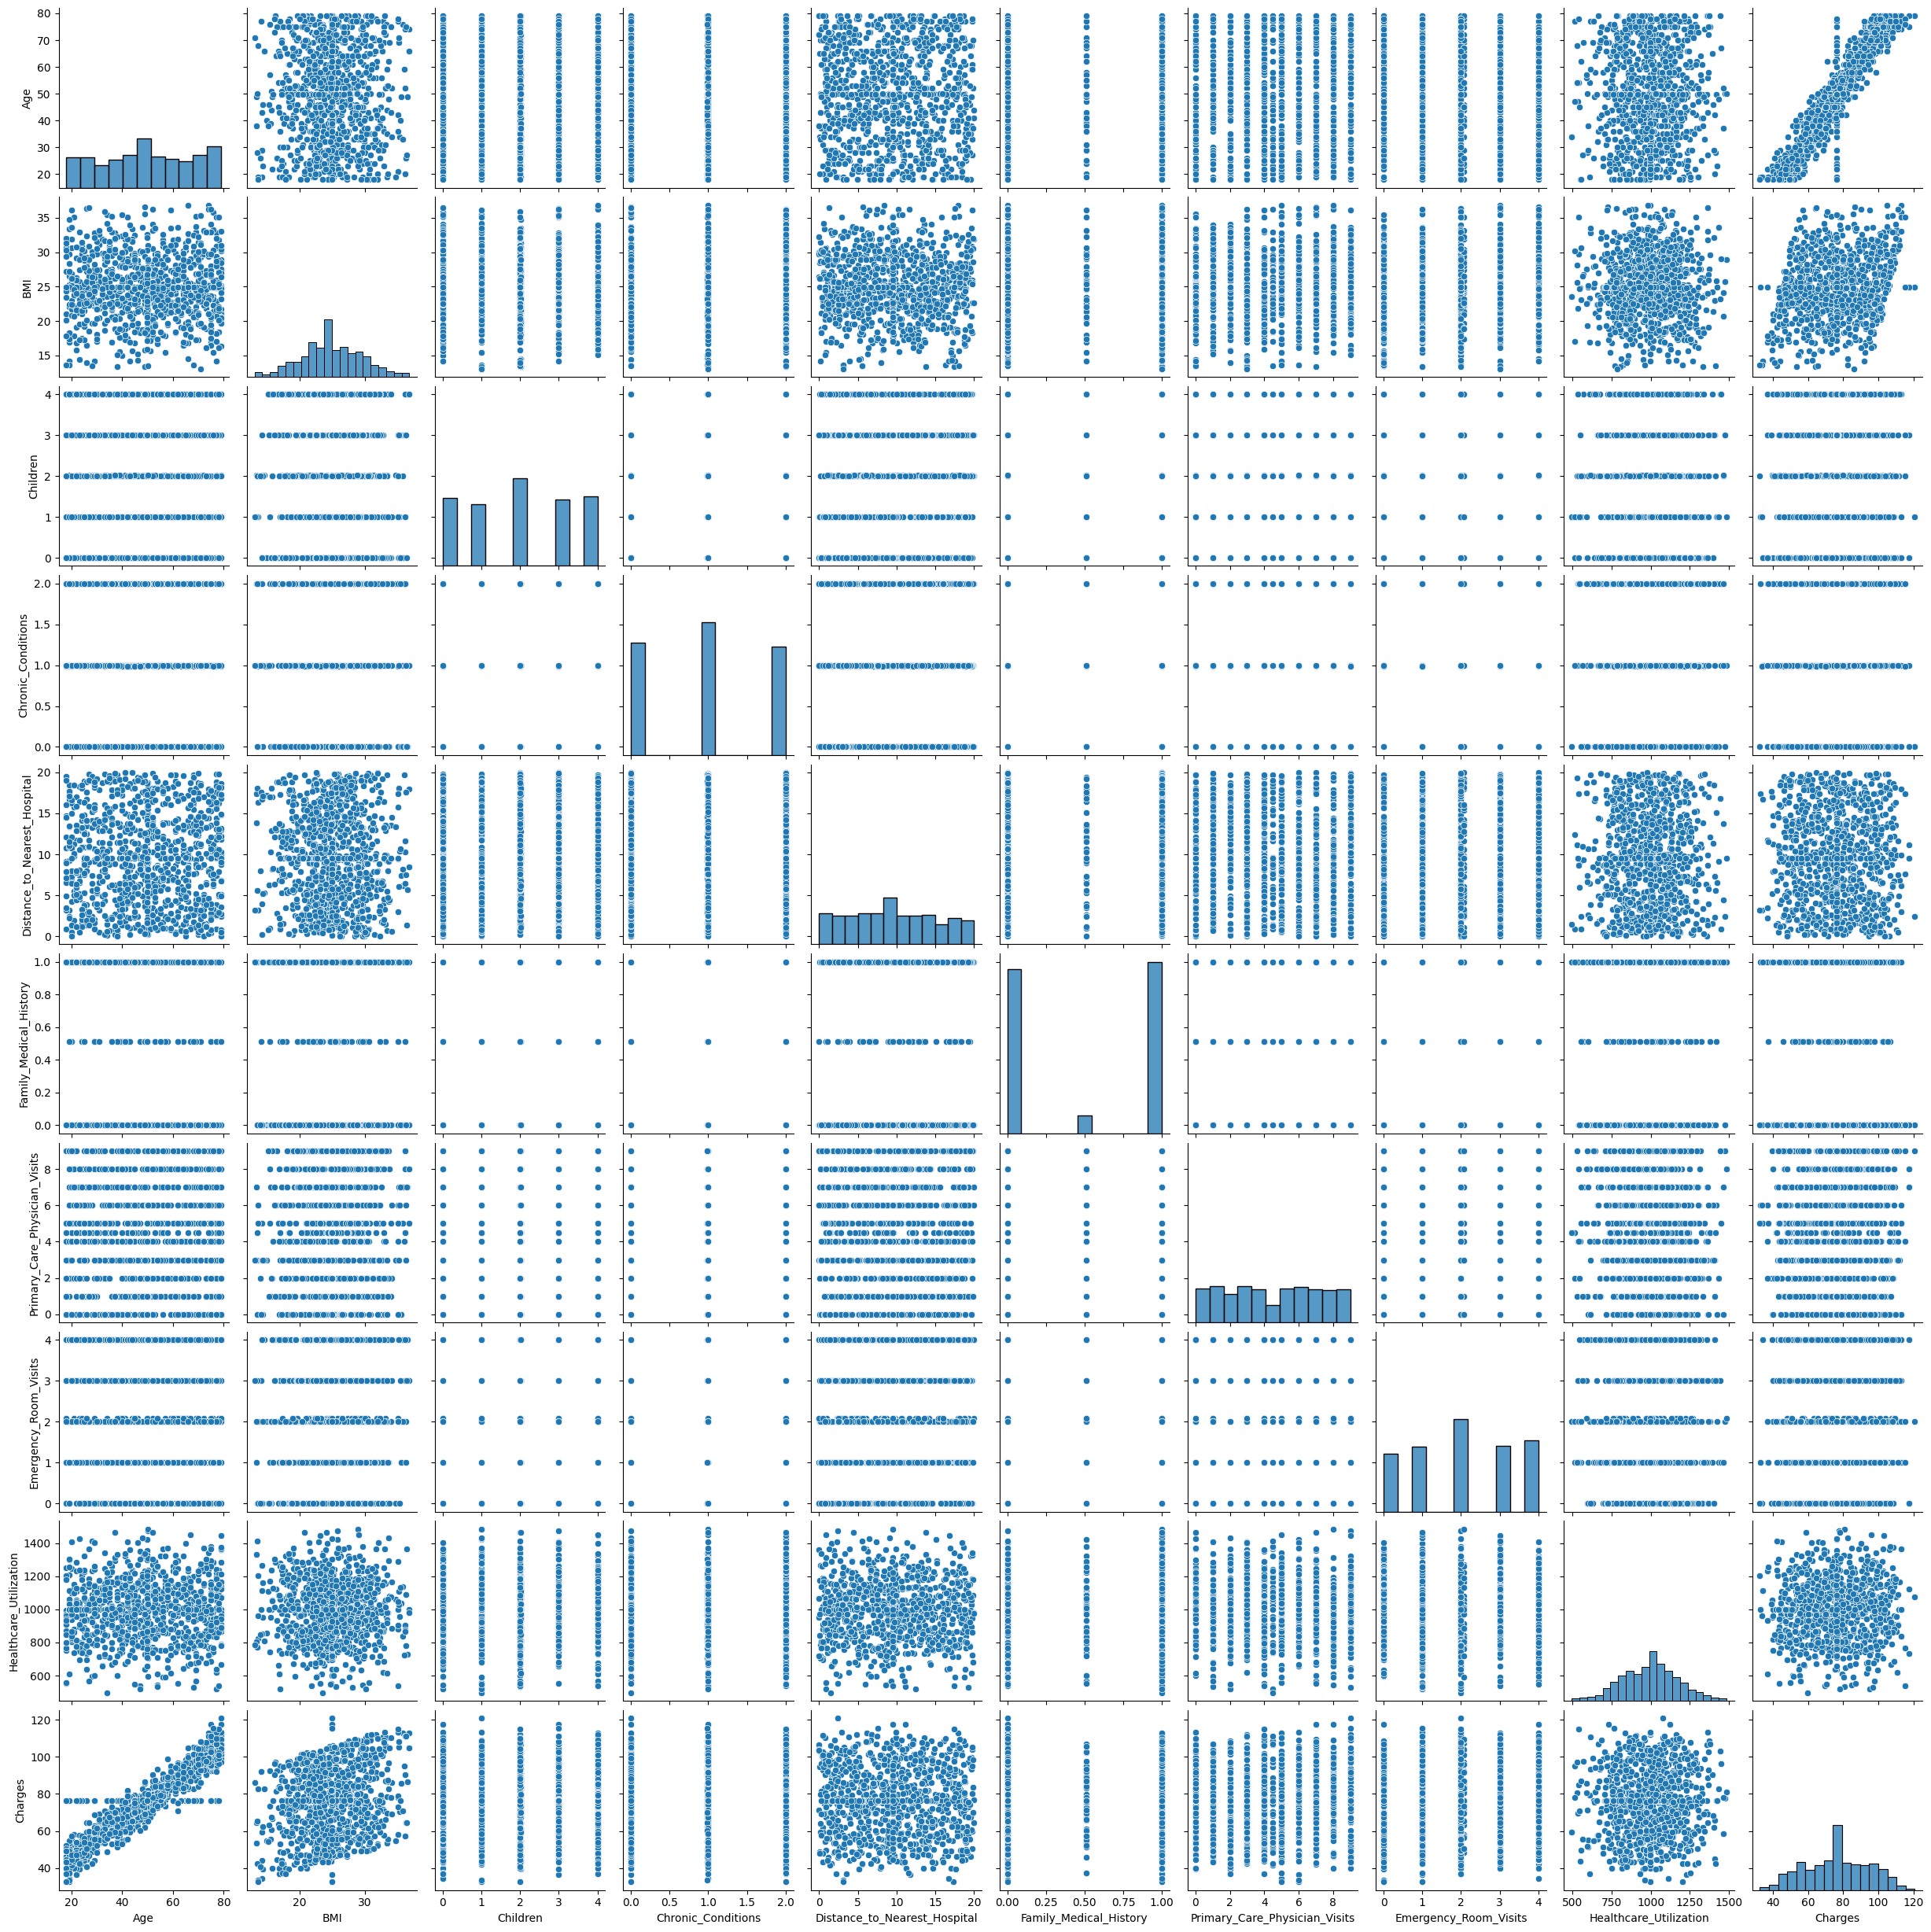

In [ ]:
sns.pairplot(df[numerical_columns])

There are few visible patterns, lets explore further.

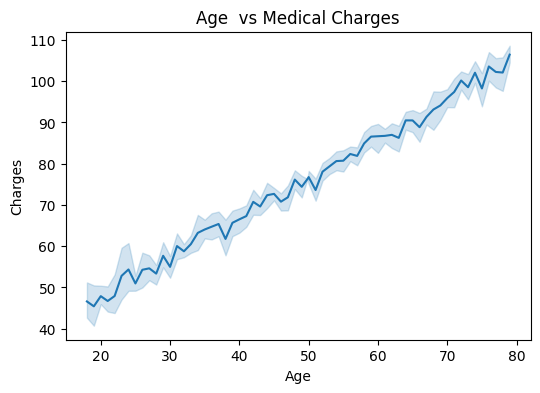

In [ ]:
plt.figure(figsize = (6, 4))
sns.lineplot(x = 'Age', y = 'Charges', data = df)
plt.title('Age  vs Medical Charges')
plt.show()

Medical Charges increases with increase in age  indicating that older individuals tend to incur higher healthcare costs.

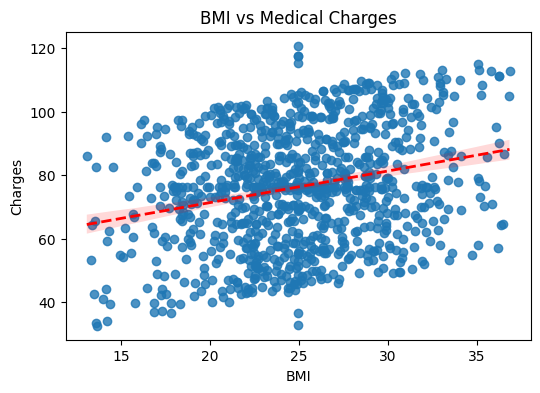

In [ ]:
plt.figure(figsize=(6, 4))
sns.regplot(x='BMI', y='Charges', data=df, line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 2})
plt.title('BMI vs Medical Charges')
plt.show()

As BMI levels increase, there's a corresponding rise in medical charges. This suggests a direct relationship between body mass index and healthcare expenses.

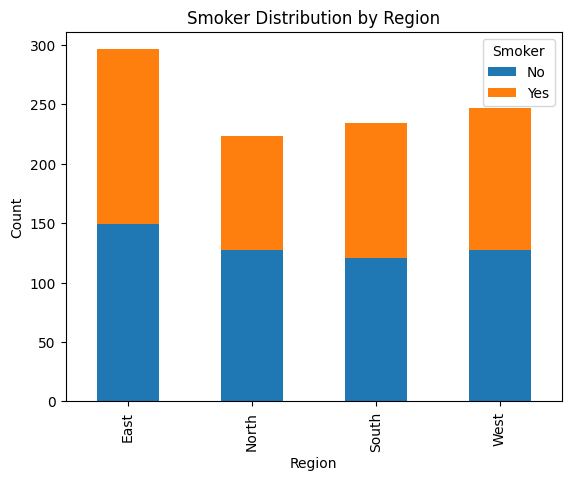

In [ ]:
stacked_bar_data = df.groupby(['Region', 'Smoker']).size().unstack()
stacked_bar_data.plot(kind='bar', stacked=True)
plt.title('Smoker Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

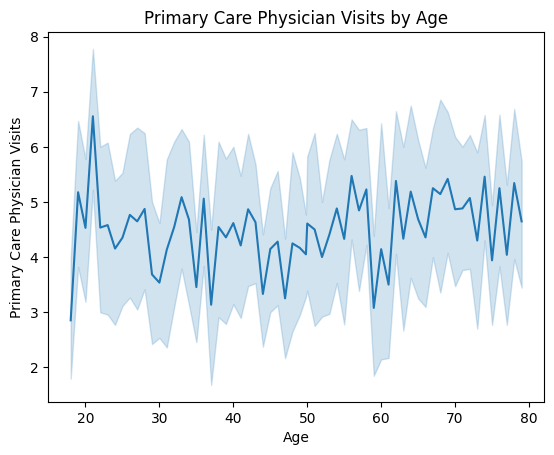

In [ ]:
sns.lineplot(data=df, x='Age', y='Primary_Care_Physician_Visits')
plt.title('Primary Care Physician Visits by Age')
plt.xlabel('Age')
plt.ylabel('Primary Care Physician Visits')
plt.show()

There is no visible pattern.

# Feature Engineering

In [ ]:
# Encoding :label encoding categorical columns

from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
categorical = df.select_dtypes(include = "object")
for column in categorical.columns:
  df[column] = encoder.fit_transform(df[column])

In [ ]:
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,...,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization,Charges
0,56.0,1,26.78763,0.0,0,0,2,0,2.0,1,...,0,1,0,1,0,1,1,4.0,975.5380,84.78763
1,69.0,1,22.06365,4.0,1,3,2,1,2.0,0,...,0,1,0,0,0,1,0,2.0,1047.9770,92.06365
2,46.0,0,24.03610,2.0,1,0,2,2,1.0,2,...,0,0,0,0,1,0,1,2.0,836.3854,71.03610
3,32.0,1,24.22982,2.0,0,1,0,2,2.0,1,...,0,0,0,1,1,0,0,0.0,927.0653,58.22982
4,60.0,1,31.78428,0.0,0,0,0,3,0.0,2,...,1,1,1,1,1,1,0,2.0,1260.7970,91.78428


In [ ]:
df.corr()

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,...,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization,Charges
Age,1.000000,0.053345,0.010555,0.026279,-0.004239,0.005593,-0.040729,-0.052188,-0.051093,0.017010,...,-0.018808,0.000202,-0.027238,-0.025694,0.020989,-0.021240,-0.036018,-0.020328,0.025289,0.937173
Sex,0.053345,1.000000,0.018504,0.003616,0.084873,-0.008481,0.001624,-0.046448,0.006499,0.019586,...,-0.029608,0.011271,0.014572,0.091378,-0.001385,-0.024982,0.000443,-0.012396,0.011499,0.057241
BMI,0.010555,0.018504,1.000000,-0.004613,0.028012,-0.005819,0.016001,-0.051831,0.040257,0.073864,...,-0.013818,0.040196,0.009758,-0.034720,-0.011035,-0.009502,0.026621,0.056314,-0.017408,0.253861
Children,0.026279,0.003616,-0.004613,1.000000,0.001472,0.010446,0.057696,-0.017602,-0.028874,-0.033525,...,0.029724,0.024510,0.016552,-0.019042,0.019221,-0.033759,-0.018397,0.049350,0.016167,0.021925
Smoker,-0.004239,0.084873,0.028012,0.001472,1.000000,0.000639,-0.014135,-0.064289,-0.036356,0.012337,...,-0.046773,0.001558,-0.059398,-0.061479,0.032666,-0.006473,-0.033481,0.041095,0.015737,-0.011352
Region,0.005593,-0.008481,-0.005819,0.010446,0.000639,1.000000,0.024481,0.012575,0.039670,0.027703,...,-0.046479,0.000028,-0.032179,-0.029679,0.027027,0.019147,0.010634,-0.037937,0.003804,0.007420
Occupation,-0.040729,0.001624,0.016001,0.057696,-0.014135,0.024481,1.000000,-0.015402,-0.011593,0.002782,...,-0.042354,0.052370,0.001671,0.004020,0.006077,0.009175,-0.032018,0.009672,-0.000330,-0.031538
Exercise_Frequency,-0.052188,-0.046448,-0.051831,-0.017602,-0.064289,0.012575,-0.015402,1.000000,0.026020,0.006536,...,-0.080706,0.036219,0.061380,0.004604,-0.032125,0.005072,0.022134,0.001337,-0.002310,-0.055128
Chronic_Conditions,-0.051093,0.006499,0.040257,-0.028874,-0.036356,0.039670,-0.011593,0.026020,1.000000,-0.046754,...,0.052159,0.051777,-0.011025,0.000961,-0.021561,0.026706,0.075254,0.009716,0.002922,-0.032226
Insurance_Plan_Type,0.017010,0.019586,0.073864,-0.033525,0.012337,0.027703,0.002782,0.006536,-0.046754,1.000000,...,-0.065552,0.025544,-0.027851,-0.002174,-0.022996,-0.000941,-0.022855,-0.014618,-0.034751,0.049876


In [ ]:
# Splitting Data
X = df.drop(columns=['Charges'])
y = df['Charges']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# scaler = MinMaxScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


In [ ]:
X

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,...,Physical_Activity,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization
0,0.350438,0.911867,0.397162,-1.459108,-0.953099,-1.241060,1.270750,-1.412451,1.282071,0.068434,...,-1.070478,-0.910029,0.928546,-1.110019,0.945484,-0.930415,0.928546,1.072631,1.419068,-0.106782
1,1.088109,0.911867,-0.630320,1.427240,1.049209,1.358926,1.270750,-0.549622,1.282071,-1.132165,...,0.934162,-0.910029,0.928546,-1.110019,-1.057660,-0.930415,0.928546,-0.932287,-0.059873,0.298186
2,-0.217001,-1.096651,-0.201305,-0.015934,1.049209,-1.241060,1.270750,0.313207,0.015993,1.269034,...,0.934162,-0.910029,-1.076953,-1.110019,-1.057660,1.074789,-1.076953,1.072631,-0.059873,-0.884712
3,-1.011415,0.911867,-0.159170,-0.015934,-0.953099,-0.374398,-1.263148,0.313207,1.282071,0.068434,...,0.934162,-0.910029,-1.076953,-1.110019,0.945484,1.074789,-1.076953,-0.932287,-1.538814,-0.377768
4,0.577414,0.911867,1.483951,-1.459108,-0.953099,-1.241060,-1.263148,1.176036,-1.250085,1.269034,...,0.934162,1.098866,0.928546,0.900885,0.945484,1.074789,0.928546,-0.932287,-0.059873,1.487952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.805829,0.911867,-1.558910,-1.459108,1.049209,1.358926,0.003801,-0.549622,0.015993,1.269034,...,0.934162,-0.910029,-1.076953,-1.110019,-1.057660,1.074789,0.928546,1.072631,-0.059873,-0.348969
996,-0.841183,-1.096651,-0.527095,-0.737521,1.049209,-1.241060,0.003801,-0.549622,0.015993,-1.132165,...,-1.070478,1.098866,0.928546,-1.110019,-1.057660,1.074789,0.928546,1.072631,1.419068,1.596620
997,-0.046769,0.911867,-1.452085,1.427240,-0.953099,0.492264,0.003801,-0.549622,1.282071,-1.132165,...,0.934162,1.098866,0.928546,0.900885,0.945484,-0.930415,-1.076953,1.072631,-0.799344,1.912090
998,0.804389,0.911867,-0.623260,-0.015934,-0.953099,1.358926,1.270750,0.313207,-1.250085,0.068434,...,-1.070478,-0.910029,-1.076953,-1.110019,0.945484,-0.930415,0.928546,1.072631,-1.538814,-1.203939


In [ ]:
y

0      84.787630
1      92.063650
2      71.036100
3      58.229820
4      91.784280
         ...    
995    36.794340
996    58.538240
997    69.285480
998    88.096110
999    76.292654
Name: Charges, Length: 1000, dtype: float64

In [ ]:
# Initialize Random Forest Regressor
model = RandomForestRegressor()

# Fit the model
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked features
print("Feature Importance Ranking:")
print(feature_importance_df)

Feature Importance Ranking:
                          Feature  Importance
0                             Age    0.887744
2                             BMI    0.085251
33         Healthcare_Utilization    0.004633
11   Distance_to_Nearest_Hospital    0.003713
14  Primary_Care_Physician_Visits    0.002458
32          Emergency_Room_Visits    0.001698
9             Insurance_Plan_Type    0.001265
8              Chronic_Conditions    0.001040
3                        Children    0.000983
6                      Occupation    0.000904
5                          Region    0.000882
10                 Marital_Status    0.000622
26                 Social_Support    0.000559
12                   Income_Level    0.000559
17              Employment_Status    0.000546
4                          Smoker    0.000544
13         Family_Medical_History    0.000532
24              Physical_Activity    0.000501
7              Exercise_Frequency    0.000498
15           Mental_Health_Status    0.000491
20    

In [ ]:
selected_features = X.columns[feature_importances.argsort()[-9:][::-1]]

In [ ]:
selected_features

Index(['Age', 'BMI', 'Healthcare_Utilization', 'Distance_to_Nearest_Hospital',
       'Primary_Care_Physician_Visits', 'Emergency_Room_Visits',
       'Insurance_Plan_Type', 'Chronic_Conditions', 'Children'],
      dtype='object')

In [ ]:
X = df[selected_features]
y = df['Charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Model Training and Selection

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
ma = mean_absolute_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)

print("Mean Absolute Error:",ma)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2score)

Mean Absolute Error: 1.6907651759927511
Mean Squared Error: 11.700309314745654
R-squared Score: 0.9638963065786091


In [ ]:
from xgboost import XGBRegressor

# Initialize XGBoost regressor
model = XGBRegressor()

# Fit XGBoost regression model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rsquared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", rsquared)

Mean Squared Error: 9.450452165785602
Root Mean Squared Error: 3.0741587736786795
R-squared Score: 0.9708387001994007


In [ ]:
# Model Selection & Training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred_rf = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf)
ma = mean_absolute_error(y_test, y_pred_rf)
r2score = r2_score(y_test, y_pred_rf)

print("Mean Absolute Error:",ma)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2score)

Mean Absolute Error: 1.508494493348115
Mean Squared Error: 8.900457991151839
R-squared Score: 0.9725358195259388


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Model Selection & Training
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 1.9015827924065976
Mean Squared Error: 10.07892630274825
R2 Score: 0.968899414924645


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Support Vector Machine': SVR(),
}

# Initialize an empty DataFrame to store model-wise evaluations
evaluation_df = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'R2 Score'])

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}...")
    # Train other models
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate model
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append evaluation results to a temporary DataFrame
    temp_df = pd.DataFrame({
        'Model': [name],
        'RMSE': [rmse],
        'MAE': [mae],
        'R2 Score': [r2]
    })

    # Concatenate the temporary DataFrame to the main evaluation DataFrame
    evaluation_df = pd.concat([evaluation_df, temp_df], ignore_index=True)

# Display model-wise evaluations
print(evaluation_df)

Evaluating Linear Regression...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating AdaBoost...
Evaluating Support Vector Machine...
                    Model       RMSE        MAE  R2 Score
0       Linear Regression   3.420571   1.690765  0.963896
1           Random Forest   3.256067   1.499270  0.967285
2       Gradient Boosting   3.164206   1.901186  0.969105
3                AdaBoost   6.101940   4.982654  0.885108
4  Support Vector Machine  17.644532  14.135081  0.039329


Random Forest has the lowest RMSE and MAE and highest R2 score.

## Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the grid search
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [ ]:
best_params

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
# Instantiate the Random Forest model with the best hyperparameters
best_rf_model = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'], random_state = 42)

# Train the model on the training data
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=300,
                      random_state=42)

# Model Evaluation

In [ ]:
# Evaluate the model on the validation set
y_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics (e.g., RMSE, MAE, R2 score)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Validation Set Metrics:")
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

Validation Set Metrics:
RMSE: 2.9189385180183134
MAE: 1.415982562307443
R2 Score: 0.9737091768072266


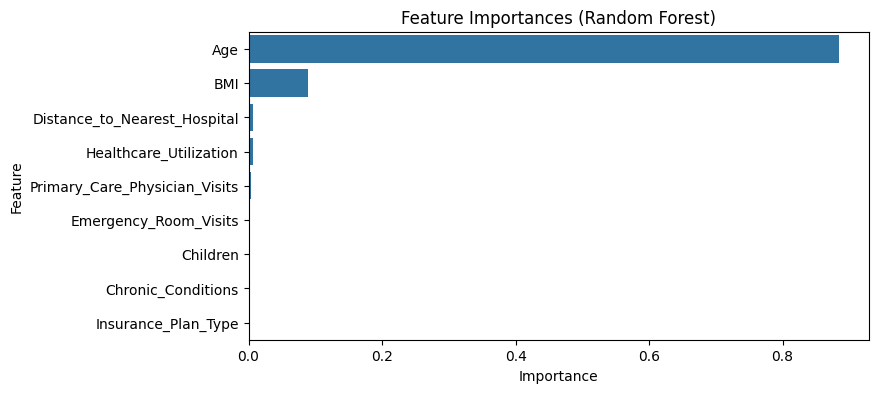

In [ ]:
# Feature Importance Analysis
importances = models['Random Forest'].feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(8, 4))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

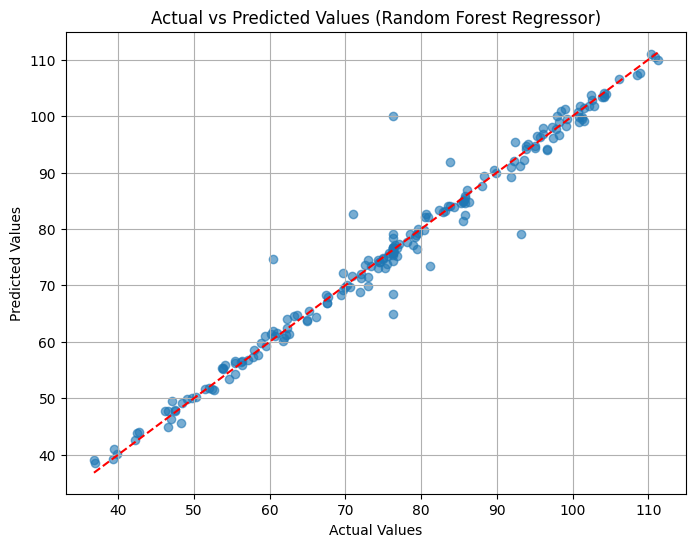

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line for reference
plt.title('Actual vs Predicted Values (Random Forest Regressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

Residuals Plot:

Plot the residuals (the differences between actual and predicted values) against the predicted values.

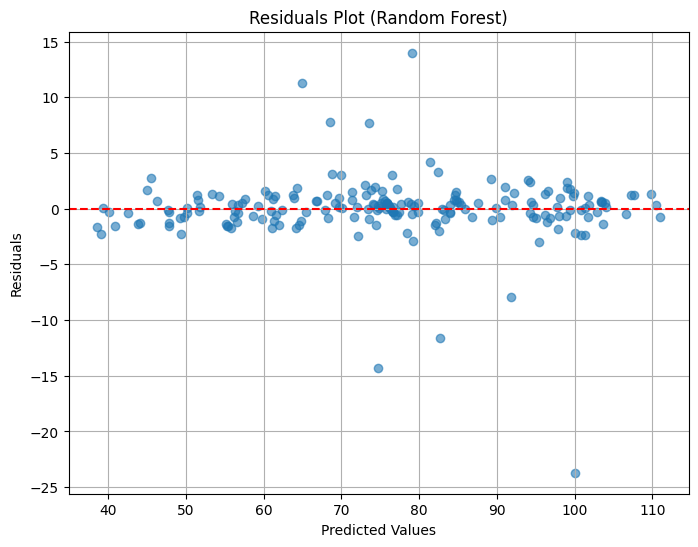

In [ ]:
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0 for reference
plt.title('Residuals Plot (Random Forest)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

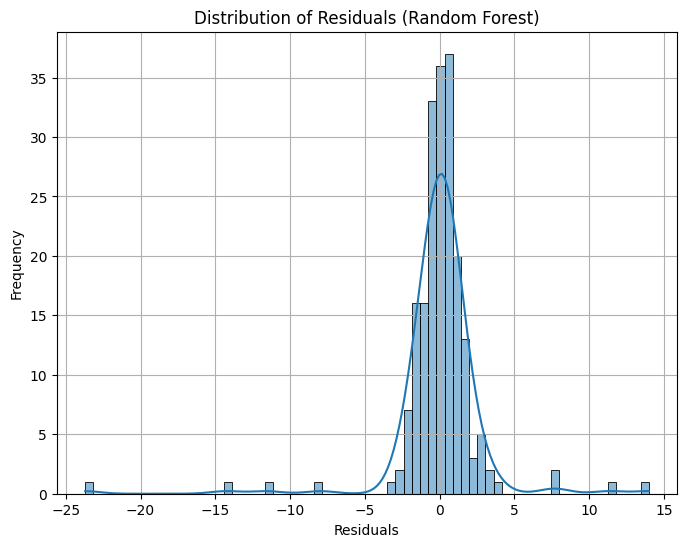

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The distribution of residuals appears to follow a normal distribution, indicating that the errors between the predicted and actual values are distributed symmetrically around zero.

# Saving the Model

In [ ]:
from joblib import dump

# Save the model
dump(best_rf_model, 'model.joblib')

['model.joblib']